# Responsi Praktikum Pengantar Teori Optimisasi
dikumpulkan Sabtu, 2 Mei 2020 23:59:00 WIB

#### Hanif Maulana Abdullah
(17/409497/PA/17804)

## 1. Metode *Golden Section*
Tentukan peminimum dan nilai minimum dari fungsi

<p style='text-align: center;'>$f(x) = 1.6x^3+3x^2-2x$<p>
<p style='text-align: justify;'>
dengan titik $x≥0$ menggunakan metode Golden Section. Bandingkan dengan solusi analitik nya.<p>

In [1]:
#METODE GOLDEN SECTION

from pandas import DataFrame #import package untuk membuat tabel
from numpy import sqrt #import sqrt yaitu package untuk menghitung nilai akar
import math #import math untuk menghitung nilai logaritma dengan basis selain e

#fungsi yg akan dicari minimumnya
def f(x):
    return(1.6*x**3+3*x**2-2*x)

#inisialisasi variabel
delta=1e-6 #toleransi sehingga panjang interval terakhir memenuhi (golden ratio)^(N-1)<delta untuk iterasi dimulai dari k=0
a=[0] #nilai awal batas bawah interval, sekaligus array untuk a_k
b=[2] #nilai awal batas bawah interval, sekaligus array untuk b_k
L=[b[0]-a[0]] #panjang interval awal, sekaligus array untuk L (panjang interval)
alpha=[] #array untuk a_(k+1), yaitu nilai k saat iterasi ke-(k-1)
beta=[] #array untuk b_(k+1), yaitu nilai k saat iterasi ke-(k-1) 
falpha=[] #array untuk f(a_k)
fbeta=[] #array untuk f(b_k)
kn=[] #array untuk "iterasi ke-k"

#mencari nilai N, diperoleh dari rumus metode golden section.
#N dibuat bernilai integer (otomatis dibulatkan ke atas), supaya dapat dihitung dalam array dan loop khususnya.
#61803 merupakan nilai golden ratio yang diperoleh dari hasil pembulatan (akar(5)-1)/2
N=int(math.log(delta/L[0],0.61803))

#mulai iterasi metode golden section (loop)
#iterasi dimulai dari k=0 sampai k=N-1 (atau dari k=1 sampai k=N)
for k in range (N-1):
    kn.append(' ') #array "iterasi ke-k" diisi spasi untuk memanfaatkan penomoran baris yang sudah bawaan dari python
    alpha.append(a[k]+(3-sqrt(5))/2*L[k])
    #menghitung titik yang mempunyai selisih sebesar 1-(golden ratio) dengan titik a_k sepanjang interval [a_k,b_k])
    #kemudian dimasukkan dalam array alpha
    beta.append(a[k]+(1-(3-sqrt(5))/2)*L[k])
    #menghitung titik yang mempunyai selisih sebesar 1-(golden ratio) dengan titik b_k sepanjang interval [a_k,b_k])
    #kemudian dimasukkan dalam array beta
    falpha.append(f(alpha[k])) #memasukkan nilai f(a_k) ke array falpha
    fbeta.append(f(beta[k])) #memasukkan nilai f(b_k) ke array fbeta

    #cek mana yang lebih kecil antara falpha dengan fbeta
    #jika falpha < fbeta, artinya f minumumnya ada di antara a dan beta
    #jika fbeta <= falpha, artinya f minumumnya ada di antara alpha dan b
    if falpha[k]<fbeta[k]:
        a.append(a[k]) #a_k tetap menjadi batas bawah interval baru
        b.append(beta[k]) #b_(k+1) menjadi batas atas interval baru
    else:
        a.append(alpha[k]) #a_(k+1) menjadi batas bawah interval baru
        b.append(b[k]) #b_k tetap menjadi  batas atas interval baru
    
    L.append(b[k+1]-a[k+1]) #menghitung panjang interval baru

#nilai alpha, beta, falpha, fbeta terakhir diisi NaN agar panjang array sama
#nilai kn terakhir diisi ' ' agar panjang array sama
#sehingga array dapat dituliskan dalam bentuk tabel
alpha.append(float('nan'))
beta.append(float('nan'))
falpha.append(float('nan'))
fbeta.append(float('nan'))
kn.append(' ')

xp=a[N-1]+(b[N-1]-a[N-1])/2 #pada iterasi terakhir, dapat langsung didefinisikan peminimum fungsi yaitu xp
fxp=f(xp) #menghitung nilai fungsi xp yaitu f(xp)

print('Titik Optimum f adalah (%f,%f)' %(xp,fxp)) #membuat output nilai minimum fungsi
data={'Iterasi ke-$k$':kn,'$a_k$':a,'$a_k$$_+$$_1$':alpha,'$b_k$$_+$$_1$':beta,'$b_k$':b,\
      '$f(a_k)$':falpha,'$f(b_k)$':fbeta, '$\rho$':(3-sqrt(5))/2, '$L$':L} #membuat tabel
DataFrame(data) #print tabel

Titik Optimum f adalah (0.273494,-0.289860)


,Iterasi ke-$k$,$a_k$,$a_k$$_+$$_1$,$b_k$$_+$$_1$,$b_k$,$f(a_k)$,$f(b_k)$,$\rho$,$L$
0,,0.000000,0.763932,1.236068,2.000000,0.936232,5.133126,0.381966,2.000000
1,,0.000000,0.472136,0.763932,1.236068,-0.107143,0.936232,0.381966,1.236068
2,,0.000000,0.291796,0.472136,0.763932,-0.288405,-0.107143,0.381966,0.763932
3,,0.000000,0.180340,0.291796,0.472136,-0.253728,-0.288405,0.381966,0.472136
4,,0.180340,0.291796,0.360680,0.472136,-0.288405,-0.256017,0.381966,0.291796
5,,0.180340,0.249224,0.291796,0.360680,-0.287342,-0.288405,0.381966,0.180340
6,,0.249224,0.291796,0.318107,0.360680,-0.288405,-0.281134,0.381966,0.111456
7,,0.249224,0.275535,0.291796,0.318107,-0.289842,-0.288405,0.381966,0.068884
8,,0.249224,0.265485,0.275535,0.291796,-0.289584,-0.289842,0.381966,0.042572
9,,0.265485,0.275535,0.281746,0.291796,-0.289842,-0.289565,0.381966,0.026311


Diketahui solusi analitik untuk peminimum dan nilai minimum dari fungsi $f$ dengan

<p style='text-align: center;'>$f(x) = 1.6x^3+3x^2-2x$<p>
<p style='text-align: justify;'>
dengan titik $x≥0$ adalah $(0.2734941105353,-0.2898597855496)$ yang diperoleh dengan menggunakan aplikasi geogebra calculator. sebenarnya $(0.2734941105353,-0.2898597855496)$ juga merupakan nilai pendekatan, hanya saja lebih akurat sebab dihitung menggunakan aplikasi kalkulator. Dengan demikian diperoleh selisih nilai peminimum dan nilai minumum fungsi f antara nilai pendekatan dari metode golden section dengan solusi "analitik"-nya yaitu:<p>
    
<p style='text-align: center;'>selisih nilai peminimum : $|0.273494-0.2734941105353| = 0.0000001105353$<p>
<p style='text-align: center;'>selisih nilai minimum $f$ : $|-0.289860-(-0.2898597855496)| = 0.00000021445039$<p>
    
merupakan bilangan yang sangat kecil. Nilainya lebih kecil dari $\delta$ yang dipilih pada program metode golden section yaitu $\delta$$=0.000001$<p>

### Grafik
Berikut merupakan program untuk membuat grafik grafik fungsi $f$ dengan

<p style='text-align: center;'>$f(x) = 1.6x^3+3x^2-2x$<p>
    
pada interval $[-3,3]$, $[0,2]$, dan $[0,0.6]$

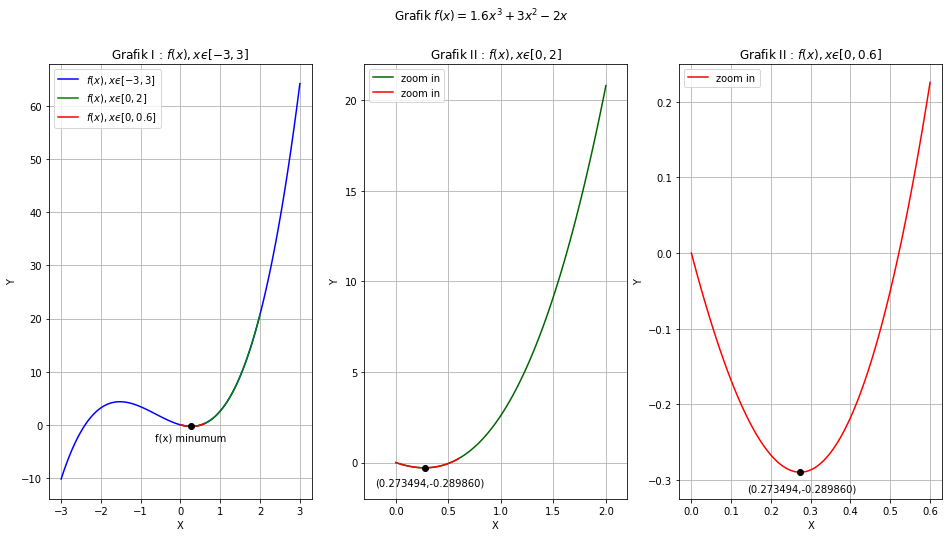

In [2]:
import matplotlib.pyplot as plt
from numpy import linspace

plt.figure(figsize=(16,8))
plt.suptitle("Grafik $f(x) = 1.6x^3+3x^2-2x$")

plt.subplot(131)
x=linspace(-3,3,100)
x0=linspace(0,2,100)
x1=linspace(0,0.6,100)
xb=linspace(0.273494,0.273494,1)
plt.plot(x,f(x),label="$f(x), xϵ[-3,3]$",color='b')
plt.plot(x0,f(x0),label="$f(x), xϵ[0,2]$",color='green')
plt.plot(x1,f(x1),label="$f(x), xϵ[0,0.6]$",color='r')
plt.plot(xb,f(xb),'bo',color='black')
plt.title("Grafik I : $f(x), xϵ[-3,3]$")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='best')
plt.annotate('f(x) minumum', xy=(-0.65,-3), xytext=(-0.65,-3))
plt.grid()

plt.subplot(132)
x0=linspace(0,2,100)
x1=linspace(0,0.6,100)
xb=linspace(0.273494,0.273494,1)
plt.plot(x0,f(x0),label="zoom in",color='darkgreen')
plt.plot(x1,f(x1),label="zoom in",color='r')
plt.plot(xb,f(xb),'bo',color='black')
plt.title("Grafik II : $f(x), xϵ[0,2]$")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([-0.3,2.2,-2,22])
plt.legend(loc='best')
plt.annotate('(%f,%f)' %(xp,fxp), xy=(-0.2,-1.3), xytext=(-0.2,-1.3))
plt.grid()

plt.subplot(133)
x1=linspace(0,0.6,100)
xb=linspace(0.273494,0.273494,1)
plt.plot(x1,f(x1),label="zoom in",color='r')
plt.plot(xb,f(xb),'bo',color='black')
plt.title("Grafik II : $f(x), xϵ[0,0.6]$")
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([-0.03,0.63,-0.325,0.25])
plt.legend(loc='best')
plt.annotate('(%f,%f)' %(xp,fxp), xy=(0.15,-0.31), xytext=(0.14,-0.315))
plt.grid()

plt.show()

# Interpretasi
<p style='text-align: justify;'>
Program di atas merupakan program untuk menentukan peminimum dan nilai minimum fungsi $f$ dengan
</p>

<p style='text-align: center;'>$f(x) = 1.6x^3+3x^2-2x$<p>
<p style='text-align: justify;'>
dengan titik $x≥0$ menggunakan metode *golden section*, serta program untuk membuat grafik fungsi $f$ pada interval $[-3,3]$, $[0,2]$, dan $[0,0.6]$

Diambil ***DataFrame*** dari *package* ***pandas***, ***sqrt*** dari *package* ***numpy***. *DataFrame* digunakan untuk membuat pengeluaran berupa tabel, sedangkan *sqrt* digunakan untuk menghitung nilai akar pangkat dua. Serta diambil ***math*** untuk menghitung nilai logaritma dengan basis selain e.

Terlebih dahulu didefinisikan :
1. **delta** menyatakan bilangan $\delta$$=0.000001>0$ cukup kecil, yaitu toleransi sehingga panjang interval terakhir memenuhi $(1-$$\rho$$)^($$^N$$^-$$^1$$^)$$<$$\delta$ untuk iterasi dimulai dari $k=0$ sehingga panjang interval akhir yang diperoleh kurang dari $\delta$. Catatan : $(1-$$\rho)$ merupakan golden ratio, dengan $\rho$$=$$\frac 12$$(3-$$\sqrt5$$)$.
2. array untuk $a_k$ yaitu **a[ ]** menyatakan **batas bawah** interval utama saat $k$. sebagai awalan dipilih $a_0=0$.
3. array untuk $b_k$ yaitu **b[ ]** menyatakan **batas atas** interval utama saat $k$. sebagai awalan dipilih $b_0=2$
4. array **L=[ ]** menuyatakan panjang interval utama saat $k$. sebagai awalan **L=[b[0]-a[0]]** menyatakan bilangan $L_0=b_0-a_0$ saat $k=0$.
5. array untuk $a_k$$_+$$_1$ yaitu **alpha[ ]** yang menyatakan pemilihan titik pertama.
6. array untuk $b_k$$_+$$_1$ yaitu **beta[ ]** yang menyatakan pemilihan titik kedua
7. array **falpha[ ]** menyatakan nilai $f(a_k$$_+$$_1)$ dalam interval utama saat $k$.
8. array **fbeta[ ]** menyatakan nilai $f(b_k$$_+$$_1)$ dalam interval utama saat $k$.
9. array **kn** diisi dengan ' ' (spasi) untuk memanfaatkan penomoran baris yang sudah bawaan dari python untuk menyatakan kolom 'Iterasi ke-' pada tabel
10. bilangan $N=^0$$^.$$^6$$^1$$^8$$^0$$^3$$\log($$\delta$$/L_0)$. Dalam hal ini dipilih **N=int(math.log(delta/L[0],0.61803))** agar diperoleh nilai N yang bulat, sehingga dapat dilakukan *loop* pada poin 11.
11. bilangan $k=0$ sebagai nilai awal. $k$ sebagai indeks yang bergerak dari $k=0$ sampai $k=N-1$ (sama saja dengan dari $k=1$ sampai $k=N$).

Selanjutnya, berikut merupakan algoritme utama **"Metode *golden section*"**.
Dilakukan *loop* dari $k=0$ sampai $k=N-1$, diperoleh :
    
1. Dihitung $a_k$$_+$$_1$ yaitu titik yang mempunyai selisih sebesar $\rho$ dengan titik $a_k$ dan $b_k$$_+$$_1$ yaitu titik yang mempunyai selisih sebesar $\rho$ dengan titik $b_k$ sepanjang interval utama berdasarkan aturan metode *golden section*. 
2. Jika $k<N-1$ dan $f(a_k$$_+$$_1)<f(b_k$$_+$$_1)$, maka $a_k$$_+$$_1=a_k$ dan $b_k$$_+$$_1=\beta_k$.
3. Jika $k<N-1$ dan $f(a_k$$_+$$_1)≥f(b_k$$_+$$_1)$, maka $a_k$$_+$$_1=\alpha_k$ dan $b_k$$_+$$_1=b_k$.
4. Jika $k=N-1$, maka dapat langsung didefinisikan peminimum fungsi, $xp=a[N-1]+(b[N-1]-a[N-1])/2$

Dengan menggunakan program di atas, diperoleh nilai pengoptimum (minimum) dari fungsi $f$ adalah $x=0.273494$ dengan nilai minimum $f(x)=-0.289860$    
    
<p style='text-align: justify;'>
Sebagai tambahan, "alpha.append(float('nan'))", dkk. dipilih agar pada iterasi terakhir, nilai dari $a_1$, dkk., diganti oleh $NaN$ (Not a Number). Tujuannya untuk mengisi kekosongan pada tabel baris terakhir agar program tetap berjalan normal.    

**Kelebihan :**
- Program ini dapat digunakan untuk mencari nilai pemngoptimum (minimum) suatu fungsi nonlinear dengan *line-search* tanpa menggunakan derivatif.
- Lebih lanjut, metode *golden section* merupakan salah satu metode untuk menyelesaikan masalah optimisasi nonlinear dimensi satu tanpa kendala tanpa menggunakan derivatif.

**Kekurangan :**
- Karena program ini hanya mencari nilai pendekatan dari solusi analitiknya, maka dalam program ini harus dipilih terlebih dahulu toleransi untuk panjang interval terakhir, agar program ini dapat berjalan dan selesai. Dalam hal ini dipilih erornya yaitu $\delta=0.000001$.
- Program ini hanya dapat menentukan satu nilai peminimum fungsi pada interval yang tepat. Diperhatikan bahwa fungsi $f$ bukan merupakan fungsi unimodal, sehingga untuk menggunakan metode *golden section* harus dipilih suatu interval yang hanya memuat satu titik puncak (ekstrem) saja. Dalam hal ini sudah diketahui di soal untuk $x≥0$
- Untuk membuat grafik terlihat menarik, dibutuhkan ketekunan yang tinggi. Khususnya dalam pemilihan koordinat untuk menandai titik minimum fungsi $f$ beserta koordinatnya.

## 2. Metode *Golden Section*, Metode Selang Tiga Titik, Metode *Newton*, dan Metode *Secant*
Pada bagian ini saya menggunakan empat metode yang sudah diajarkan untuk menghitung solusi dari soal berikut. Hal ini untuk mengukur kekonvergenan solusi, sebab tidak diketahui solusi analitiknya. Akibatnya digunakan metode pendekatan yang lain dengan harapan solusinya memiliki solusi yang saling dekat. Saya menggunakan hasil metode golden section sebagai solusi pendekatan utama.

A wire carrying an electric current is surrounded by rubber insulation of outer radius $r$. The resistance of the wire generate heat, which is conducted through the insulation and convected into the surrounding air. The temperature of the
wire can be shown to be

<p style='text-align: center;'>$T=$$\frac12$$\frac q\pi$$($$\frac 1k$$ln($$\frac ra$$)+$$\frac 1h$$\frac 1r$$ ) + T_∞$<p>
<p style='text-align: justify;'>
where
    
$q$ = rate of heat generation in wire = $50 W/m$\
$a$ = radius of wire = $5 mm$\
$k$ = therma conductivity of rubber = $0.16 W/m·K$\
$h$ = convective heat-transfer coefficient = $20 W/m^2·K$\
$T_∞$ = ambient temperature = $280 K$\
Find $r$ that minimizes $T$.

Dimisalkan $T=f$ dan $r=x$ sehingga dengan mensubstitusikan $q=50$, $a=0.005$, $k=0.16$, $h=20$, dan $T_∞=280$ ke persamaan di atas diperoleh fungsi $f$ dengan

<p style='text-align: center;'>$f(x)=(50/2$$\pi)$$((ln(x/0.005)/0.16)+1/(20x))+280$<p>

In [3]:
#METODE SELANG TIGA TITIK

from numpy import log, pi
from numpy import linspace
from pandas import DataFrame

def h(x):
    return(((50/(2*pi))*(((log(x/0.005))/0.16)+(1/(20*x))))+280)

k=0
a=[0]
b=[200]
L=b[0]-a[0]
alpha=[]
beta=[]
gamma=[]
halpha=[]
hbeta=[]
hgamma=[]

while L>10**(-5):
    s=linspace(a[k],b[k],5)
    alpha.append(s[1])
    beta.append(s[2])
    gamma.append(s[3])
    halpha.append(h(alpha[k]))
    hbeta.append(h(beta[k]))
    hgamma.append(h(gamma[k]))
    
    if halpha[k]<hbeta[k]<hgamma[k]:
        a.append(a[k])
        b.append(beta[k])
    elif halpha[k]>hbeta[k]>hgamma[k]:
        a.append(beta[k])
        b.append(b[k])
    else:
        a.append(alpha[k])
        b.append(gamma[k])
    
    k=k+1
    L=(b[k]-a[k])/4

alpha.append(float('nan'))
beta.append(float('nan'))
gamma.append(float('nan'))
halpha.append(float('nan'))
hbeta.append(float('nan'))
hgamma.append(float('nan'))

xp=(b[k]+a[k])/2
hxp=h(xp)

print('Titik optimum h adalah (%f,%f)' %(xp,hxp))
data={'a':a,'alpha':alpha,'beta':beta,'gamma':gamma,'b':b,'h(alpha)':halpha,'h(beta)':hbeta,'h(gamma)':hgamma}
DataFrame(data)

Titik optimum h adalah (0.007999,353.111983)


,a,alpha,beta,gamma,b,h(alpha),h(beta),h(gamma)
0,0.000000,50.000000,100.000000,150.000000,200.000000,738.092707,772.563041,792.727894
1,0.000000,25.000000,50.000000,75.000000,100.000000,703.626352,738.092707,758.256235
2,0.000000,12.500000,25.000000,37.500000,50.000000,669.167955,703.626352,723.787227
3,0.000000,6.250000,12.500000,18.750000,25.000000,634.725474,669.167955,689.323525
4,0.000000,3.125000,6.250000,9.375000,12.500000,600.314823,634.725474,654.870433
5,0.000000,1.562500,3.125000,4.687500,6.250000,565.967835,600.314823,620.438562
6,0.000000,0.781250,1.562500,2.343750,3.125000,531.748170,565.967835,586.049132
7,0.000000,0.390625,0.781250,1.171875,1.562500,497.783153,531.748170,551.744585
8,0.000000,0.195312,0.390625,0.585938,0.781250,464.327432,497.783153,517.609803
9,0.000000,0.097656,0.195312,0.292969,0.390625,431.890303,464.327432,483.814551


In [4]:
#METODE NEWTON
#Tebakan Awal x0=1

import sympy as sym #agar fungsi dapat diderivatifkan
from sympy import *
from numpy import log, pi
from pandas import DataFrame

x=Symbol('x') #menyatakan x sebagai simbol, shg dapat diderivatifkan

#Diasumsikan fungsi yg akan dicari peminimumnya mempunyai turunan pertama dan kedua pada R
y=((50/(2*pi))*(((sym.log(x/0.005))/0.16)+(1/(20*x))))+280 #fungsi yg akan dicari peminimumnya
y1=sym.diff(y,x) #turunan pertama
y2=sym.diff(y1,x) #turunan kedua

y=lambdify(x, y) #mencari nilai fungsi saat x
y1=lambdify(x,y1) #mencari nilai fungsi turunan pertama saat x
y2=lambdify(x,y2) #mencari nilai fungsi turunan kedua saat x

#inisialisasi variabel
eps=1e-5
error=eps+10
xh=[0.01] #menyatakan tebakan awal x0=1, sekaligus array nilai x
yh=[y(xh[0])] #menyatakan nilai fungsi tebakan awal, sekaligus array nilai fungsi saat x
errorh=[error] #menyatakan eror awal, sekaligus array eror
k=0 #menyatakan iterasi ke-0

while error>=eps:
    xh.append(xh[k]-y1(xh[k])/y2(xh[k])) #nilai x saat iterasi ke-(k+1)
    yh.append(y(xh[k+1])) #nilai fungsi saat iterasi ke-(k+1)
    error=abs(xh[k+1]-xh[k])
    errorh.append(error) #array error untuk ditampikan pada tabel
    k=k+1
else:
    xp=xh[k] #keluar dari loop, shg diperoleh xp peminimum fungsi
    
print('Titik minimumnya adalah',(xp,y(xp)))
data={'x':xh,'f(x)':yh, 'error':errorh}
DataFrame(data) #membuat tabel

#untuk nilai awal x0=1.1 algoritme newton tidak dapat digunakan,
#sebab setiap iterasi bertambah, maka nilai error akan semakin besar, sehingga "while" tidak akan berhenti
#seterusnya hal ini berlaku untuk setiap x0>=1.1 atau x0<=-1.1

Titik minimumnya adalah (0.007999999977717494, 353.1119824867139)


,x,f(x),error
0,0.010000,354.263048,1.000001e+01
1,0.006667,353.991236,3.333333e-03
2,0.007619,353.172155,9.523810e-04
3,0.007965,353.112451,3.463203e-04
4,0.008000,353.111983,3.433348e-05
5,0.008000,353.111982,2.985297e-07


In [5]:
#METODE SECANT

import sympy as sym
from sympy import *
from numpy import log, pi
from pandas import DataFrame

x=Symbol('x') #menyatakan x sebagai simbol, shg dapat diderivatifkan

y=((50/(2*pi))*(((sym.log(x/0.005))/0.16)+(1/(20*x))))+280 #fungsi yg akan dicari minimumnya
y1=sym.diff(y,x) #turunan pertama

y=lambdify(x, y) #mencari nilai fungsi saat x
y1=lambdify(x,y1) #mencari nilai fungsi turunan pertama saat x

#Dimisalkan x_k-1 = alfa, x_k = beta, x_k+1 = gamma, untuk setiap k

#inisialisasi variabel
eps=0.001
error=eps+10
alpha=[0.0075] #menyatakan nilai tebakan awal x0=0.5, sekaligus array nilai x_k-1
beta=[0.0085] #menyatakan nilai tebakan awal x1=2, sekaligus array nilai x_k
gamma=[] #menyatakan array nilai x_k+1
yalpha=[y(alpha[0])] #menyatakan nilai fungsi tebakan awal x0=0.5, sekaligus array nilai fungsi saat x_k-1
ybeta=[y(beta[0])] #menyatakan nilai tebakan awal x1=2, sekaligus array nilai fungsi saat x_k
ygamma=[] #menyatakan array nilai fungsi saat x_k+1
errorh=[] #menyatakan array eror
k=0 #menyatakan iterasi ke-0

while error>=eps:
    alpha.append(beta[k])
    beta.append(beta[k]-((beta[k]-alpha[k])/(y1(beta[k])-y1(alpha[k])))*y1(beta[k]))
    gamma.append(beta[k+1])
    
    yalpha.append(y(alpha[k+1]))
    ybeta.append(y(beta[k+1]))
    ygamma.append(y(gamma[k]))
    
    error=abs(beta[k+1]-beta[k])
    errorh.append(error)
    k=k+1
else:
    xp=beta[k] #keluar dari loop, shg diperoleh xp peminimum fungsi

gamma.append(float('nan')) #agar panjang semua array sama, shg dapat dibuat tabel
ygamma.append(float('nan')) #agar panjang semua array sama, shg dapat dibuat tabel
errorh.append(float('nan')) #agar panjang semua array sama, shg dapat dibuat tabel

print('Titik optimumnya adalah',(xp,y(xp)))
data={'$x_k$$_-$$_1$':alpha, '$x_k$':beta, '$x_k$$_+$$_1$':gamma,\
      '$f(x_k$$_-$$_1)$':yalpha, '$f(x_k)$':ybeta,\
      '$f(x_k$$_+$$_1)$':ygamma, 'error':errorh}
DataFrame(data) #membuat tabel

Titik optimumnya adalah (0.008062256809338513, 353.11347302658567)


,$x_k$$_-$$_1$,$x_k$,$x_k$$_+$$_1$,$f(x_k$$_-$$_1)$,$f(x_k)$,$f(x_k$$_+$$_1)$,error
0,0.0075,0.008500,0.008062,353.217828,353.201561,353.113473,0.000438
1,0.0085,0.008062,NaN,353.201561,353.113473,NaN,NaN


In [6]:
#METODE GOLDEN SECTION

from pandas import DataFrame #import package untuk membuat tabel
from numpy import sqrt, pi, log #import sqrt yaitu package untuk menghitung nilai akar
import math #import math untuk menghitung nilai logaritma dengan basis selain e

#fungsi yg akan dicari minimumnya
def f(x):
    return(((50/(2*pi))*(((log(x/0.005))/(0.16))+((1)/(20*x))))+280)

#inisialisasi variabel
delta=1e-6 #toleransi sehingga panjang interval terakhir memenuhi (golden ratio)^(N-1)<delta untuk iterasi dimulai dari k=0
a=[0] #nilai awal batas bawah interval, sekaligus array untuk a_k
b=[200] #nilai awal batas bawah interval, sekaligus array untuk b_k
L=[b[0]-a[0]] #panjang interval awal, sekaligus array untuk L (panjang interval)
alpha=[] #array untuk a_(k+1), yaitu nilai k saat iterasi ke-(k-1)
beta=[] #array untuk b_(k+1), yaitu nilai k saat iterasi ke-(k-1) 
falpha=[] #array untuk f(a_k)
fbeta=[] #array untuk f(b_k)
kn=[] #array untuk "iterasi ke-k"

#mencari nilai N, diperoleh dari rumus metode golden section.
#N dibuat bernilai integer (otomatis dibulatkan ke atas), supaya dapat dihitung dalam array dan loop khususnya.
#61803 merupakan nilai golden ratio yang diperoleh dari hasil pembulatan (akar(5)-1)/2
N=int(math.log(delta/L[0],0.61803))

#mulai iterasi metode golden section (loop)
#iterasi dimulai dari k=0 sampai k=N-1 (atau dari k=1 sampai k=N)
for k in range (N-1):
    kn.append(' ') #array "iterasi ke-k" diisi spasi untuk memanfaatkan penomoran baris yang sudah bawaan dari python
    alpha.append(a[k]+(3-sqrt(5))/2*L[k])
    #menghitung titik yang mempunyai selisih sebesar 1-(golden ratio) dengan titik a_k sepanjang interval [a_k,b_k])
    #kemudian dimasukkan dalam array alpha
    beta.append(a[k]+(1-(3-sqrt(5))/2)*L[k])
    #menghitung titik yang mempunyai selisih sebesar 1-(golden ratio) dengan titik b_k sepanjang interval [a_k,b_k])
    #kemudian dimasukkan dalam array beta
    falpha.append(f(alpha[k])) #memasukkan nilai f(a_k) ke array falpha
    fbeta.append(f(beta[k])) #memasukkan nilai f(b_k) ke array fbeta

    #cek mana yang lebih kecil antara falpha dengan fbeta
    #jika falpha < fbeta, artinya f minumumnya ada di antara a dan beta
    #jika fbeta <= falpha, artinya f minumumnya ada di antara alpha dan b
    if falpha[k]<fbeta[k]:
        a.append(a[k]) #a_k tetap menjadi batas bawah interval baru
        b.append(beta[k]) #b_(k+1) menjadi batas atas interval baru
    else:
        a.append(alpha[k]) #a_(k+1) menjadi batas bawah interval baru
        b.append(b[k]) #b_k tetap menjadi  batas atas interval baru
    
    L.append(b[k+1]-a[k+1]) #menghitung panjang interval baru

#nilai alpha, beta, falpha, fbeta terakhir diisi NaN agar panjang array sama
#nilai kn terakhir diisi ' ' agar panjang array sama
#sehingga array dapat dituliskan dalam bentuk tabel
alpha.append(float('nan'))
beta.append(float('nan'))
falpha.append(float('nan'))
fbeta.append(float('nan'))
kn.append(' ')

xp=a[N-1]+(b[N-1]-a[N-1])/2 #pada iterasi terakhir, dapat langsung didefinisikan peminimum fungsi yaitu xp
fxp=f(xp) #menghitung nilai fungsi xp yaitu f(xp)

print('Titik Optimum f adalah (%f,%f)' %(xp,fxp)) #membuat output nilai minimum fungsi
data={'Iterasi ke-$k$':kn,'$a_k$':a,'$a_k$$_+$$_1$':alpha,'$b_k$$_+$$_1$':beta,'$b_k$':b,\
      '$f(a_k)$':falpha,'$f(b_k)$':fbeta, '$\rho$':(3-sqrt(5))/2, '$L$':L} #membuat tabel
DataFrame(data) #print tabel

Titik Optimum f adalah (0.008000,353.111982)


,Iterasi ke-$k$,$a_k$,$a_k$$_+$$_1$,$b_k$$_+$$_1$,$b_k$,$f(a_k)$,$f(b_k)$,$\rho$,$L$
0,,0.000000,76.393202,123.606798,200.000000,759.171557,783.103081,0.381966,200.000000
1,,0.000000,47.213595,76.393202,123.606798,735.241264,759.171557,0.381966,123.606798
2,,0.000000,29.179607,47.213595,76.393202,711.312959,735.241264,0.381966,76.393202
3,,0.000000,18.033989,29.179607,47.213595,687.387874,711.312959,0.381966,47.213595
4,,0.000000,11.145618,18.033989,29.179607,663.467997,687.387874,0.381966,29.179607
5,,0.000000,6.888371,11.145618,18.033989,639.556548,663.467997,0.381966,18.033989
6,,0.000000,4.257247,6.888371,11.145618,615.658734,639.556548,0.381966,11.145618
7,,0.000000,2.631123,4.257247,6.888371,591.782983,615.658734,0.381966,6.888371
8,,0.000000,1.626124,2.631123,4.257247,567.942932,591.782983,0.381966,4.257247
9,,0.000000,1.005000,1.626124,2.631123,544.160643,567.942932,0.381966,2.631123


### Grafik
Berikut merupakan program untuk membuat grafik grafik fungsi $f$ dengan

<p style='text-align: center;'>$f(x)=(50/2$$\pi)$$((ln(x/0.005)/0.16)+(1/20x))+280$<p>
<p style='text-align: center;'>atau<p>
<p style='text-align: center;'>$T(r)=(50/2$$\pi)$$((ln(r/0.005)/0.16)+(1/20r))+280$<p>
    
pada interval $(0,500]$ dan $(0,5]$

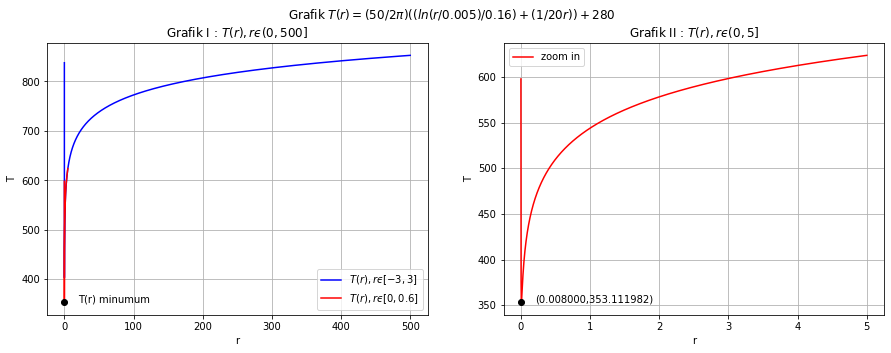

In [7]:
import matplotlib.pyplot as plt
from numpy import linspace

plt.figure(figsize=(15,5))
plt.suptitle("Grafik $T(r)=(50/2$$\pi)$$((ln(r/0.005)/0.16)+(1/20r))+280$")

plt.subplot(121)
x=linspace(0.0006,500,10000)
x0=linspace(0.001,5,10000)
xb=linspace(0.008000,0.008000,1)
plt.plot(x,f(x),label="$T(r), rϵ[-3,3]$",color='b')
plt.plot(x0,f(x0),label="$T(r), rϵ[0,0.6]$",color='r')
plt.plot(xb,f(xb),'bo',color='black')
plt.title("Grafik I : $T(r), rϵ(0,500]$")
plt.xlabel('r')
plt.ylabel('T')
plt.legend(loc='best')
plt.annotate('T(r) minumum', xy=(20,353), xytext=(20,353))
plt.grid()

plt.subplot(122)
x0=linspace(0.001,5,10000)
xb=linspace(0.008000,0.008000,1)
plt.plot(x0,f(x0),label="zoom in",color='r')
plt.plot(xb,f(xb),'bo',color='black')
plt.title("Grafik II : $T(r), rϵ(0,5]$")
plt.xlabel('r')
plt.ylabel('T')
plt.legend(loc='best')
plt.annotate('(%f,%f)' %(xp,fxp), xy=(0.2,353), xytext=(0.2,353))
plt.grid()

plt.show()

# Interpretasi
<p style='text-align: justify;'>
Program di atas merupakan program untuk menentukan peminimum dan nilai minimum fungsi $f$ dengan
</p>

<p style='text-align: center;'>$f(x)=(50/2$$\pi)$$((ln(x/0.005)/0.16)+(1/20x))+280$<p>
<p style='text-align: justify;'>
    
dengan titik $x≥0$ menggunakan metode *golden section*, metode selang tiga titik, metode *newton*, dan metode *secant* serta program untuk membuat grafik fungsi $f$ pada interval $(0,500]$ dan $(0,5]$ berdasarkan hasil metode *golden section*.

Dari metode-metode di atas diperoleh pasangan **(nilai peminimum, nilai minimum)** sebagai berikut :

1. $(0.008000,353.111982)$ : metode *golden section*
2. $(0.007999999977717494, 353.1119824867139)$ : metode selang tiga titik
3. $(0.007999999977717494, 353.1119824867139)$ : metode *newton*
4. $(0.008062256809338513, 353.11347302658567)$ : metode *secant*    

yang kesemuanya mempunyai nilai yang saling mendekati satu sama lain.
      
Catatan:
1. Interval awal yang digunakan untuk metode golden section adalah : $[0,200]$, serta dipilih $\delta=0.000001$
2. Interval awal yang digunakan untuk metode selang tiga titik adalah : $[0,200]$, serta dipilih $toleransi=0.00001$
3. Tebakan awal yang digunakan untuk metode newton adalah : $x_0=0.00001$, serta dipilih $eps=0.00001$ 
4. Tebakan awal yang digunakan untuk metode secant adalah : $x_0=0.0075$ dan $x_0=0.0085$, serta $eps=0.001$    

Dari sini perlu diperhatikan bahwa:
1. Interval awal yang dipilih untuk metode golden section dan metode selang tiga titik harus memuat solusinya.
2. Tebakan awal yang dipilih untuk metode newton harus sangat dekat dengan solusinya.
3. Tebakan awal yang dipilih untuk metode secant harus sangat dekat dengan solusinya dan terbentuk interval dari kedua tebakan awal yang memuat solusinya.

Apabila ketiga syarat di atas tidak dipenuhi, maka program berkemungkinan tidak bisa dijalankan. <p>
    
**Kelebihan :**
- Dengan menggunakan keempat metode di atas untuk mencari solusi dari permasalahan yang sama, dapat diperoleh hasil akhir yang mengindikasikan seberapa baik program-program tersebut menyelesaikan permasalahan tersebut. Dalam hal ini keempat program dapat menyelesaikan permasalahan dengan baik dengan kondisi-kondisi tertentu yang harus dipenuhi (agar mempunyai solusi).
- Keempat program bekerja dengan baik. Hal ini dapat dilihat dari solusi yang kesemuanya mempunyai nilai yang saling mendekati satu sama lain.

**Kekurangan :**
- Karena tidak diketahui solusi analitikanya, maka untuk mengecek apakah solusi konvergen ke suatu nilai, harus dicek menggunakan solusi pendekatan dengan metode (program) lain. Dalam hal ini dipilih metode golden section, metode selang tiga titik, metode newton, dan metode secant.
- Karena program-program ini hanya mencari nilai pendekatan dari solusi analitiknya, maka dalam program ini harus dipilih terlebih dahulu interval atau tebakan awal dan toleransi yang tepat(menyesuaikan untuk masing-masing program).
- Untuk program metode newton dan secant, karena membutuhkan turunan pertama dan/atau turunan kedua, maka fungsi yang akan dicari peminimumnya harus mempunyai diferensiabel. Dalam hal ini fungsi $T$ diferensiabel untuk $r>0$, sehingga untuk menentukan tebakan awal untuk metode newton dan secant, pastikan tebakan awal terdefinisi.
- Analog untuk metode golden section dan metode selang tiga titik. Karena fungsi $T$ tidak terdefinisi untuk $r=0$, maka pastikan pemilihan interval awal tidak memuat $r=0$.
- Lebih lanjut, secara geometris, memang jari-jari $r≥0$. Tetapi tidak perlu diselidiki untuk $r=0$. Sebab apa gunanya membuat kawat tanpa jari-jari (sama saja tidak membuat kawat).
    
Dengan demikian dapat disimpulkan, diperoleh jari-jari kawat $≈ 0.008 meter$ (atau $8 mm$) paling baik sehingga suhu kawat  minimum $≈ 353.111982 K$ (atau sekitar $79,961982^oC$)

## 3. Interpolasi Lagrange dan Metode *Golden Section*
<p style='text-align: justify;'>
Seorang ilmuwan sedang meneliti perubahan suhu dari sebuah benda selama 3 menit. Setiap setengah menit, ilmuwan tersebut mencatat perubahan suhu benda tersebut seperti yang tercantum pada tabel pada soal. Perkirakan kapan benda tersebut pernah mencapai suhu tertingginya, dan berapakah suhu tertingginya?

Terlebih dahulu dilakukan interpolasi dari data yang diketahui, sehingga diperoleh fungsi polinomial derajat 6. Dalam hal ini digunakan interpolasi lagrange menggunakan ***lagrange*** dari package ***scipy.interpolate***

In [8]:
from numpy import linspace
from scipy.interpolate import lagrange

t=linspace(0,3,7)
T=[1.842, 2.4694, 2.4921, 1.9047, 0.8509, -0.4112, -1.5727]
print(lagrange(t, T))

           6           5           4          3          2
-0.002569 x + 0.01001 x + 0.09108 x - 0.3141 x - 0.9114 x + 1.777 x + 1.842


Dari program di atas, diperoleh polinomial derajat 6 yaitu:

<p style='text-align: center;'>$T(t)=-0.002569t^6 + 0.01001t^5 + 0.09108t^4 - 0.3141t^3 - 0.9114t^2 + 1.777t + 1.842$<p>
    
yang terdefinsi pada $t≥0$.

Selanjutnya, diperhatikan pada soal bahwa yang diminta adalah prediksi kapan benda tersebut mencapai suhu tertinggi, kemudian diminta mencari suhu tertingginya ($T(t)$ maksimum). Berarti, hal ini sama saja dengan mencari nilai $t≥0$ sehingga $-T(t)$ minimum. Selanjutnya, dimisalkan $x=t$ dan didefinisikan fungsi $f$ dengan $f=-T$ sehinnga
    
<p style='text-align: center;'>$f(x)=-T(x)=0.002569x^6 - 0.01001x^5 - 0.09108x^4 + 0.3141x^3 + 0.9114x^2 - 1.777x - 1.842$<p>
    
terdefinsi pada $x≥0$.
    
Selanjutnya menggunakan metode golden section, akan dicari peminimum dan nilai minimum untuk $f$.

In [9]:
#METODE GOLDEN SECTION

from pandas import DataFrame #import package untuk membuat tabel
from numpy import sqrt #import sqrt yaitu package untuk menghitung nilai akar
import math #import math untuk menghitung nilai logaritma dengan basis selain e

#fungsi yg akan dicari minimumnya
def f(x):
    return(0.002569*x**6-0.01001*x**5-0.09108*x**4+0.3141*x**3+0.9114*x**2-1.777*x-1.842)

#inisialisasi variabel
delta=1e-6 #toleransi sehingga panjang interval terakhir memenuhi (golden ratio)^(N-1)<delta untuk iterasi dimulai dari k=0
a=[0] #nilai awal batas bawah interval, sekaligus array untuk a_k
b=[10] #nilai awal batas bawah interval, sekaligus array untuk b_k
L=[b[0]-a[0]] #panjang interval awal, sekaligus array untuk L (panjang interval)
alpha=[] #array untuk a_(k+1), yaitu nilai k saat iterasi ke-(k-1)
beta=[] #array untuk b_(k+1), yaitu nilai k saat iterasi ke-(k-1) 
falpha=[] #array untuk f(a_k)
fbeta=[] #array untuk f(b_k)
kn=[] #array untuk "iterasi ke-k"

#mencari nilai N, diperoleh dari rumus metode golden section.
#N dibuat bernilai integer (otomatis dibulatkan ke atas), supaya dapat dihitung dalam array dan loop khususnya.
#61803 merupakan nilai golden ratio yang diperoleh dari hasil pembulatan (akar(5)-1)/2
N=int(math.log(delta/L[0],0.61803))

#mulai iterasi metode golden section (loop)
#iterasi dimulai dari k=0 sampai k=N-1 (atau dari k=1 sampai k=N)
for k in range (N-1):
    kn.append(' ') #array "iterasi ke-k" diisi spasi untuk memanfaatkan penomoran baris yang sudah bawaan dari python
    alpha.append(a[k]+(3-sqrt(5))/2*L[k])
    #menghitung titik yang mempunyai selisih sebesar 1-(golden ratio) dengan titik a_k sepanjang interval [a_k,b_k])
    #kemudian dimasukkan dalam array alpha
    beta.append(a[k]+(1-(3-sqrt(5))/2)*L[k])
    #menghitung titik yang mempunyai selisih sebesar 1-(golden ratio) dengan titik b_k sepanjang interval [a_k,b_k])
    #kemudian dimasukkan dalam array beta
    falpha.append(f(alpha[k])) #memasukkan nilai f(a_k) ke array falpha
    fbeta.append(f(beta[k])) #memasukkan nilai f(b_k) ke array fbeta

    #cek mana yang lebih kecil antara falpha dengan fbeta
    #jika falpha < fbeta, artinya f minumumnya ada di antara a dan beta
    #jika fbeta <= falpha, artinya f minumumnya ada di antara alpha dan b
    if falpha[k]<fbeta[k]:
        a.append(a[k]) #a_k tetap menjadi batas bawah interval baru
        b.append(beta[k]) #b_(k+1) menjadi batas atas interval baru
    else:
        a.append(alpha[k]) #a_(k+1) menjadi batas bawah interval baru
        b.append(b[k]) #b_k tetap menjadi  batas atas interval baru
    
    L.append(b[k+1]-a[k+1]) #menghitung panjang interval baru

#nilai alpha, beta, falpha, fbeta terakhir diisi NaN agar panjang array sama
#nilai kn terakhir diisi ' ' agar panjang array sama
#sehingga array dapat dituliskan dalam bentuk tabel
alpha.append(float('nan'))
beta.append(float('nan'))
falpha.append(float('nan'))
fbeta.append(float('nan'))
kn.append(' ')

xp=a[N-1]+(b[N-1]-a[N-1])/2 #pada iterasi terakhir, dapat langsung didefinisikan peminimum fungsi yaitu xp
fxp=f(xp) #menghitung nilai fungsi xp yaitu f(xp)

print('Titik Optimum f adalah (%f,%f)' %(xp,fxp)) #membuat output nilai minimum fungsi
data={'Iterasi ke-$k$':kn,'$a_k$':a,'$a_k$$_+$$_1$':alpha,'$b_k$$_+$$_1$':beta,'$b_k$':b,\
      '$f(a_k)$':falpha,'$f(b_k)$':fbeta, '$\rho$':(3-sqrt(5))/2, '$L$':L} #membuat tabel
DataFrame(data) #print tabel

Titik Optimum f adalah (0.767854,-2.560721)


,Iterasi ke-$k$,$a_k$,$a_k$$_+$$_1$,$b_k$$_+$$_1$,$b_k$,$f(a_k)$,$f(b_k)$,$\rho$,$L$
0,,0.000000,3.819660,6.180340,10.000000,2.623888,16.158290,0.381966,10.000000
1,,0.000000,2.360680,3.819660,6.180340,0.056458,2.623888,0.381966,6.180340
2,,0.000000,1.458980,2.360680,3.819660,-1.973188,0.056458,0.381966,3.819660
3,,0.000000,0.901699,1.458980,2.360680,-2.537813,-1.973188,0.381966,2.360680
4,,0.000000,0.557281,0.901699,1.458980,-2.504126,-2.537813,0.381966,1.458980
5,,0.557281,0.901699,1.114562,1.458980,-2.537813,-2.408345,0.381966,0.901699
6,,0.557281,0.770143,0.901699,1.114562,-2.560715,-2.537813,0.381966,0.557281
7,,0.557281,0.688837,0.770143,0.901699,-2.552728,-2.560715,0.381966,0.344419
8,,0.688837,0.770143,0.820393,0.901699,-2.560715,-2.557187,0.381966,0.212862
9,,0.688837,0.739087,0.770143,0.820393,-2.559661,-2.560715,0.381966,0.131556


Dari sini diperoleh nilai pengoptimumnya yaitu $x=0.767854$ yang memberikan nilai **minimum** $f(x)=-2.560721$. Karena $f=-T$, akibatnya untuk $x=0.767854$ diperoleh :

<p style='text-align: center;'>$T(x)=-f(x)=-(-2.560721)=2.560721$.<p>
    
Karena $x=t$, maka diperoleh $T(t)=2.560721$ merupakan nilai **maksimum** untuk $T$.

### Grafik
Berikut merupakan program untuk membuat grafik grafik fungsi $f$ dan $T$ masing-masing dengan:

<p style='text-align: center;'>$f(x)=0.002569x^6 - 0.01001x^5 - 0.09108x^4 + 0.3141x^3 + 0.9114x^2 - 1.777x - 1.842$<p>

<p style='text-align: center;'>$T(t)=-0.002569t^6 + 0.01001t^5 + 0.09108t^4 - 0.3141t^3 - 0.9114t^2 + 1.777t + 1.842$<p>
    
pada interval $[0,5.5]$ dan $[0,5]$

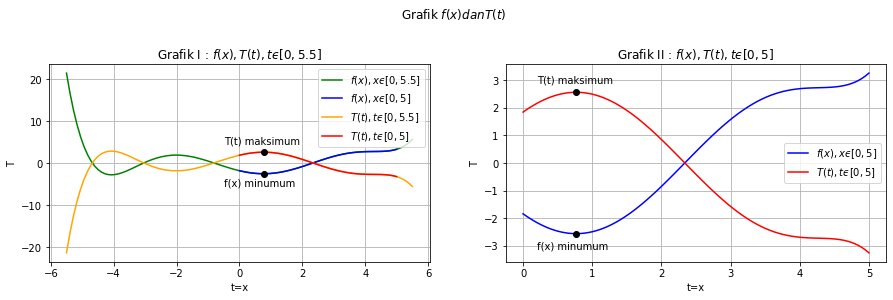

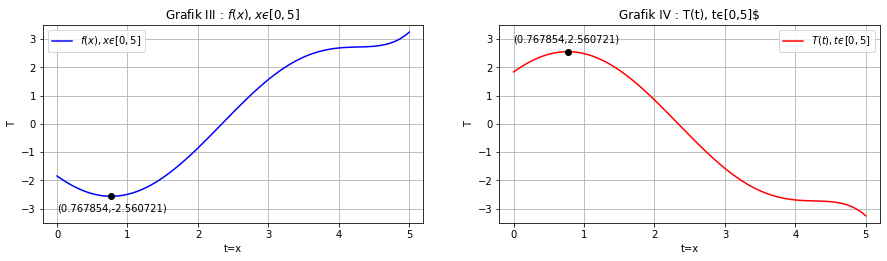

In [10]:
import matplotlib.pyplot as plt
from numpy import linspace

plt.figure(figsize=(15,8))
plt.suptitle("Grafik $f(x) dan T(t)$")

plt.subplot(221)
x=linspace(-5.5,5.5,100)
x0=linspace(0,5,100)
xb=linspace(0.767854,0.767854,1)
plt.plot(x,f(x),label="$f(x), xϵ[0,5.5]$",color='g')
plt.plot(x0,f(x0),label="$f(x), xϵ[0,5]$",color='b')
plt.plot(x,-f(x),label="$T(t), tϵ[0,5.5]$",color='orange')
plt.plot(x0,-f(x0),label="$T(t), tϵ[0,5]$",color='r')
plt.plot(xb,f(xb),'bo',color='black')
plt.plot(xb,-f(xb),'bo',color='black')
plt.title("Grafik I : $f(x), T(t), tϵ[0,5.5]$")
plt.xlabel('t=x')
plt.ylabel('T')
plt.legend(loc='upper right')
plt.annotate('f(x) minumum', xy=(0,-5.5), xytext=(-0.5,-5.5))
plt.annotate('T(t) maksimum', xy=(0,4.5), xytext=(-0.5,4.5))
plt.grid()

plt.subplot(222)
x0=linspace(0,5,100)
xb=linspace(0.767854,0.767854,1)
plt.plot(x0,f(x0),label="$f(x), xϵ[0,5]$",color='b')
plt.plot(x0,-f(x0),label="$T(t), tϵ[0,5]$",color='r')
plt.plot(xb,f(xb),'bo',color='black')
plt.plot(xb,-f(xb),'bo',color='black')
plt.title("Grafik II : $f(x), T(t), tϵ[0,5]$")
plt.xlabel('t=x')
plt.ylabel('T')
plt.legend(loc='best')
plt.annotate('f(x) minumum', xy=(0.2,-3), xytext=(0.2,-3.1))
plt.annotate('T(t) maksimum', xy=(0.2,3), xytext=(0.2,2.9))
plt.grid()

plt.figure(figsize=(15,8))

plt.subplot(223)
x0=linspace(0,5,100)
xb=linspace(0.767854,0.767854,1)
plt.plot(x0,f(x0),label="$f(x), xϵ[0,5]$",color='b')
plt.plot(xb,f(xb),'bo',color='black')
plt.title("Grafik III : $f(x), xϵ[0,5]$")
plt.xlabel('t=x')
plt.ylabel('T')
plt.axis([-0.2,5.2,-3.5,3.5])
plt.legend(loc='best')
plt.annotate('(%f,%f)' %(xp,fxp), xy=(0,-3.1), xytext=(0,-3.1))
plt.grid()

plt.subplot(224)
x0=linspace(0,5,100)
xb=linspace(0.767854,0.767854,1)
plt.plot(x0,-f(x0),label="$T(t), tϵ[0,5]$",color='r')
plt.plot(xb,-f(xb),'bo',color='black')
plt.title("Grafik IV : T(t), tϵ[0,5]$")
plt.xlabel('t=x')
plt.ylabel('T')
plt.axis([-0.2,5.2,-3.5,3.5])
plt.legend(loc='best')
plt.annotate('(%f,%f)' %(xp,-fxp), xy=(0,2.9), xytext=(0,2.9))
plt.grid()

plt.show()

# Interpretasi
<p style='text-align: justify;'>
Program di atas merupakan program untuk menentukan pengoptimum dan nilai minimum fungsi $f$ (sama saja dengan nilai maksimum $T$)dengan
</p>

<p style='text-align: center;'>$f(x)=0.002569x^6 - 0.01001x^5 - 0.09108x^4 + 0.3141x^3 + 0.9114x^2 - 1.777x - 1.842$<p>
<p style='text-align: center;'>$dan$<p>
<p style='text-align: center;'>$T(t)=-0.002569t^6 + 0.01001t^5 + 0.09108t^4 - 0.3141t^3 - 0.9114t^2 + 1.777t + 1.842$<p>
    
untuk $x=t≥0$ dengan menggunakan metode *golden section*. Diperoleh nilai pengoptimumnya yaitu $x=0.767854$ yang memberikan nilai **minimum** $f(x)=-2.560721$ atau nilai **maksimum** $T(t)=2.560721$.
    
**Kelebihan :**
- Dengan menggunakan lagrange dari package scipy.interpolate dapat dibangun suatu interpolasi (fungsi polinomial) berderajat 6 dari data yang diberikan.
- Mencari nilai maksimum suatu fungsi sama saja dengan mencari nilai minimum dari negatif fungsinya. Dalam hal ini dicari nilai maksimum fungsi $T$ dengan mencari nilai minimum fungsi $f=-T$, sehingga dapat digunakan metode pendekatan nilai optimum yang telah dipelajari.

**Kekurangan :**
- Karena program ini hanya mencari nilai pendekatan dari solusi analitiknya, maka dalam program ini harus dipilih terlebih dahulu interval awal dan toleransi untuk panjang interval terakhir, agar program ini dapat berjalan dan selesai. Dalam hal ini dipilih interval awal [0,10] dan toleransi $\delta=0.000001$.
- Dengan menggunakan geogebra calculator diperoleh solusi analitik (sebenarnya solusi pendekatan juga, hanya saja lebih akurat) yaitu (0.7678530467128, 2.5607212721063), sehingga diperoleh selisih pengoptimumnya 0.0000009532872 dan selisih nilai maksimumnya 0.0000002721063. Keduanya memiliki nilai yang tidak jauh dari toleransi, $\delta=0.000001$.
- Mudah dipahami bahwa waktu $t≥0$, sehingga tidak perlu diselidiki untuk $t<0$. Akibatnya untuk memilih interval awal, cukup dipilih interval dengan batas bawah dan batas atas bernilai 0 atau positif dan memuat solusi optimumnya.
    
Dengan demikian dapat disimpulkan, suhu benda pada soal nomor 3 akan mencapai maksimum saat $t ≈ 0.767854 menit$ dengan suhu benda tersebut mencapai $T ≈ 2.560721^oC$